# Исследование надежности заемщиков


## Изучаю общую информацию о данных

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    print('Data was not found')

In [93]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [95]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [96]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Заменяю аномальные значения с помощью медианы

In [97]:
data['days_employed'] = data['days_employed'].abs()
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [98]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Безработные и пенсионеры имеют аномально большие значения

In [99]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [100]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Заменяю аномальные значения

In [101]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [102]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [103]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Значения `None` отсутсвуют

### Изменение типов данных

In [104]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [105]:
data['education'] = data['education'].str.lower()

In [106]:
data.duplicated().sum()

71

In [107]:
data = data.drop_duplicates()
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация данных

In [108]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [109]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [110]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создаю функцию которая на основании данных из столбца `'purpose'`, создаст новый столбец `'purpose category'` в котором будут следующие категории:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [111]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [112]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Шаг 3. Исследование данных

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='pastel')
plt.rcParams['figure.figsize'] = 14,7

def pivot(data, index):

    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во должников', 'Доля невозврата']
    pivot['Доля невозврата'] = round(pivot['Доля невозврата'], 4)
    display(pivot.sort_values('Доля невозврата', ascending = False))

    fig = sns.barplot(pivot, x=index, y='Доля невозврата')
    plt.title('Доля невозврата в зависимости от кол-ва детей')
    plt.xlabel('Кол-во детей')
    plt.show()

,children,Кол-во клиентов,Кол-во должников,Доля невозврата
4,4,41,4,0.0976
2,2,2052,194,0.0945
1,1,4808,444,0.0923
3,3,330,27,0.0818
0,0,14091,1063,0.0754
5,5,9,0,0.0000


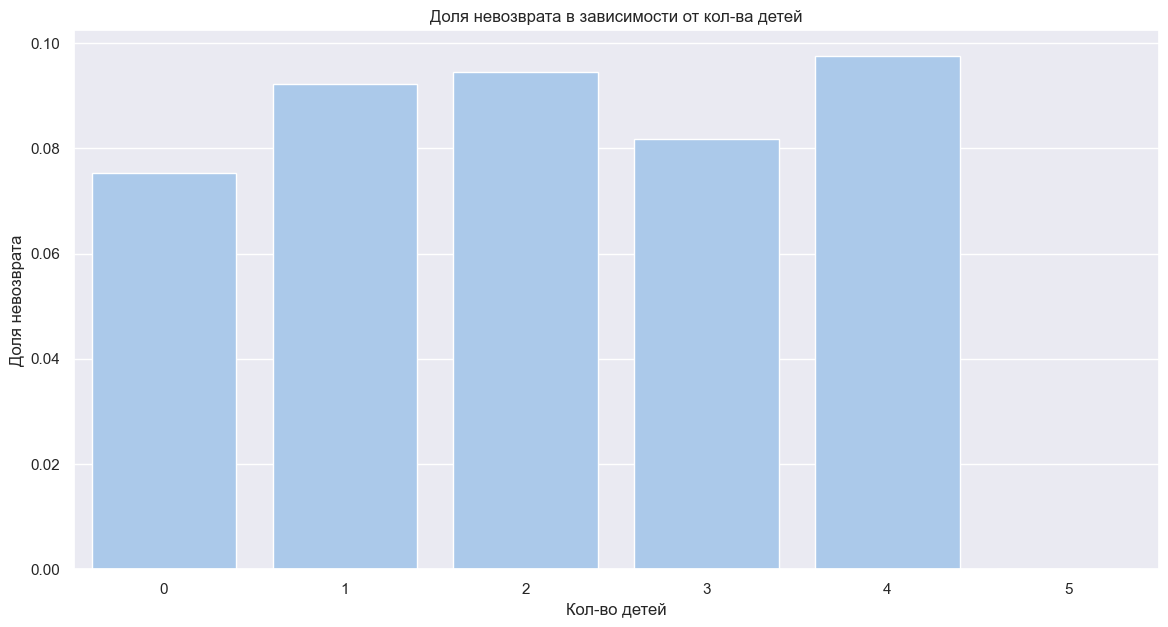

In [114]:
#датафрейм с количеством детей и информмации о задолжностях кредита
pivot(data, 'children')

**Вывод:** 
Как видно в таблице лли без детей имеют меньший процент невозврата кредита. Для многодетных мало информации для корректного вывода

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status,Кол-во клиентов,Кол-во должников,Доля невозврата
0,Не женат / не замужем,2796,273,0.0976
3,гражданский брак,4134,385,0.0931
4,женат / замужем,12261,927,0.0756
1,в разводе,1189,84,0.0706
2,вдовец / вдова,951,63,0.0662


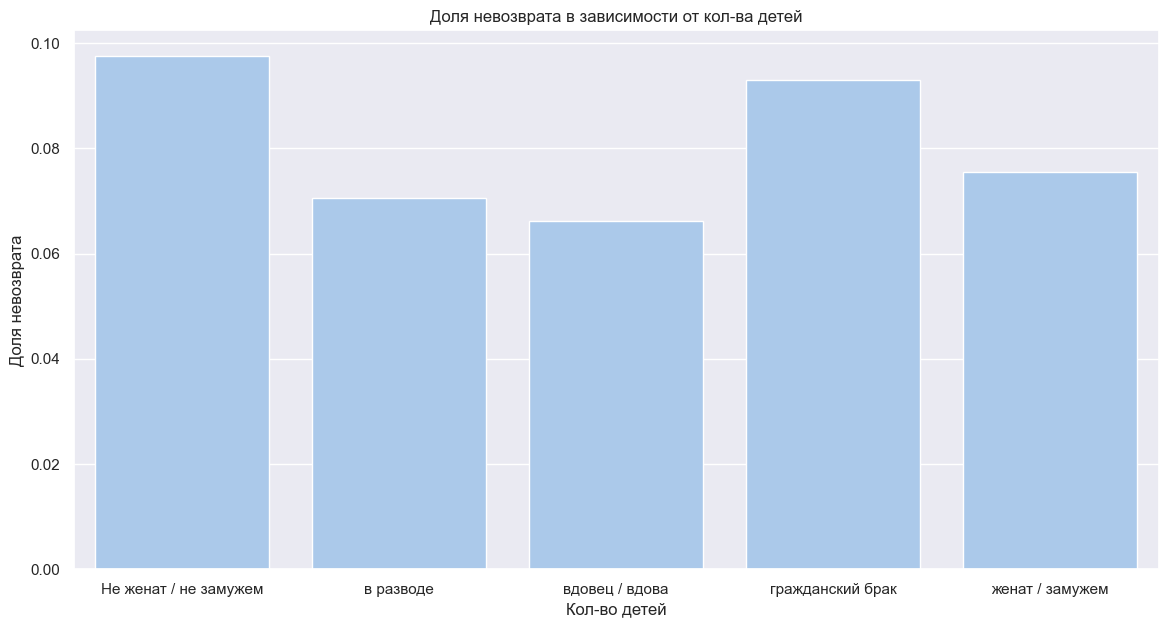

In [115]:
#датафрейм с семейным положением и информации о задолженности
pivot(data, 'family_status')

**Вывод:** 
По результатам, я могу сделать вывод, что человек который, состоял или сейчас состоит в официальном браке добросовестнее возвращает кредиты

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_category,Кол-во клиентов,Кол-во должников,Доля невозврата
4,E,22,2,0.0909
2,C,15921,1353,0.0850
0,A,25,2,0.0800
1,B,5014,354,0.0706
3,D,349,21,0.0602


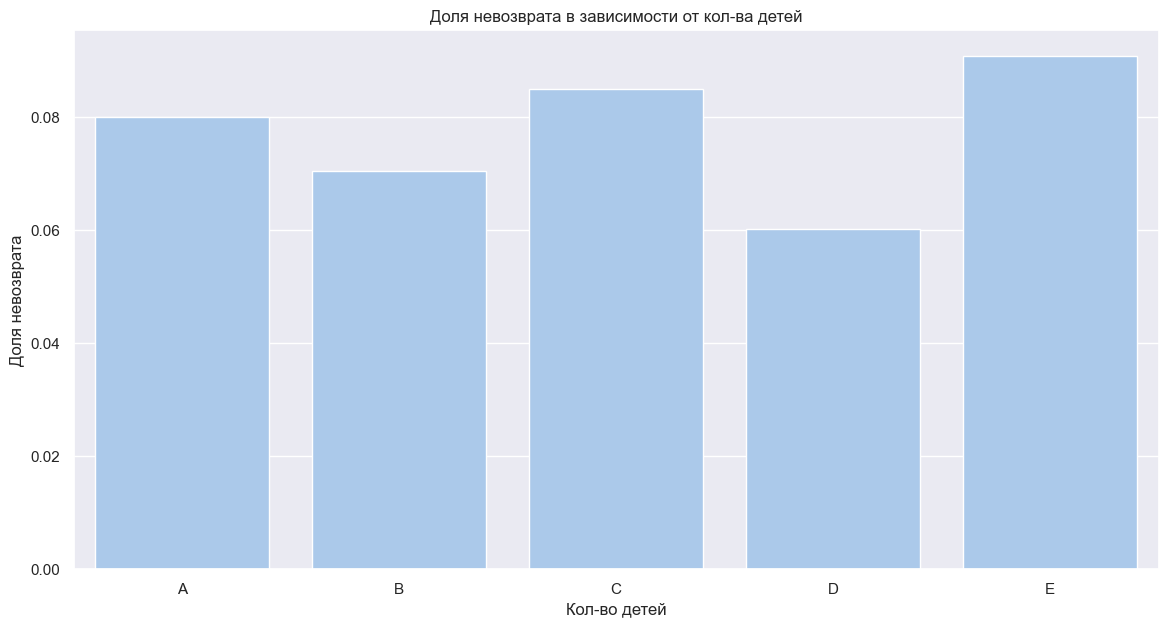

In [116]:
#датафрейм с уровнем дохода и инофрмацией о возврате кредита в срок
pivot(data, 'total_income_category')

**Вывод:** 
Достаточное количество людей только в категориях B и C. Судя по этим двум столбцам люди с высшим доходам имеют выше процент возврата кредита в срок

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,purpose_category,Кол-во клиентов,Кол-во должников,Доля невозврата
0,операции с автомобилем,4279,400,0.0935
2,получение образования,3988,369,0.0925
3,проведение свадьбы,2313,183,0.0791
1,операции с недвижимостью,10751,780,0.0726


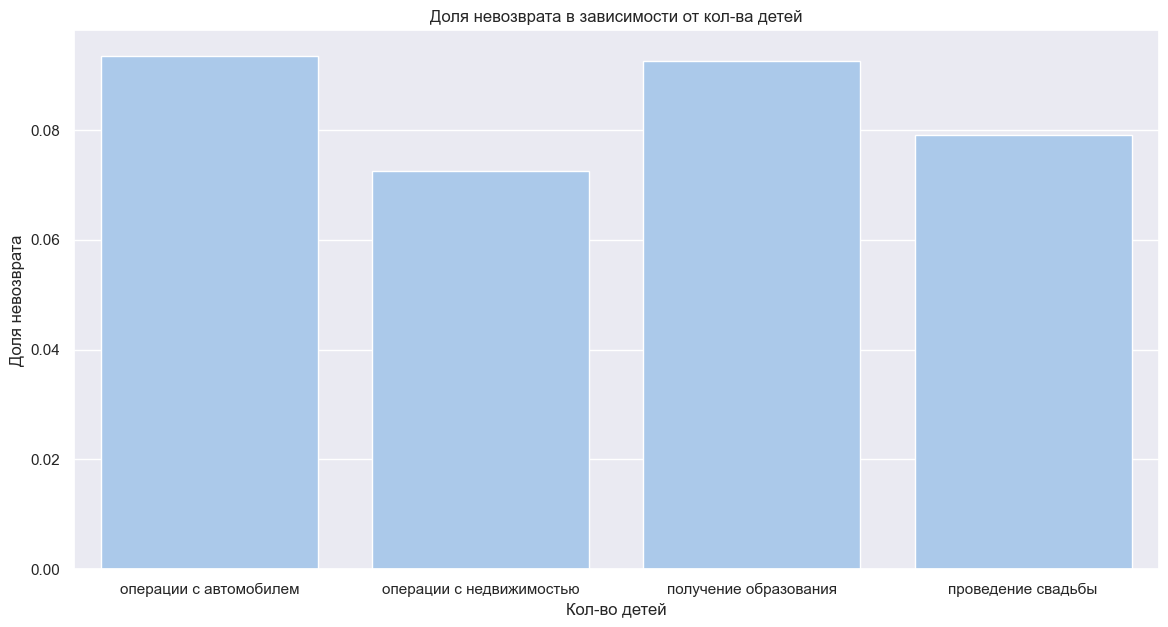

In [117]:
pivot(data, 'purpose_category')

**Вывод:** 
Наименьший процент невозврата кредита в срок у людей кто брал кредит на "операции с недвижимостью", так же маленький процент не возврата у кредитов на "проведение свадьбы". Сильное увеличение наблюдается в кредитах на "операции с автомобилем" и "получение образования"

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
В моем понимании причин может быть множество, но из основых могу выделить:
1) Человеческий фактор - всем людям присуще ошибаться
2) Возможны сбои в системе, из-за которых возможна некорректная обработка информации и как следствие пропуски

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Потому что медианное значение уменьшает влияние аномальных значений на данные таблицы

### Шаг 4: общий вывод.

***В ходе исследовательских работ по поиск зависимости влияния показателей на невозврат кредитов были произведены следующие действия:***

1) Проведена обработка данных

2) Исправленны пропуски данных в столбцах "total_income"(данные о доходах) и "days_employed"(количчество дней трудового стажа), пропуски заменены медианными значениями по категориям

3) Создано два новых стобца "total_income_category"(доходы людей разделены на доп категории) и "purpose_category"(все предыдущие причины получения кредита разделены на 4 основные категории)

4) Созданы таблицы для визуализации показателей их влияния на невозврат кредита

***Признаки клиента с высоким уровнем риска***

-Люди не состоящие в официальном браке

-Люди берущие кредиты на операции с автомобилем и на получение образования

*-Люди с меньшей категорией доходов (однако данных о категориях A, D и E не достаточно что бы делать корректные выводы)*

***Признаки "Идеального клиента"***

-Люди состоящие или состоявшие в официальном браке

-Люди не имеющие детей

-Люди берущие кредит на операции с недвижимостью

-Люди с категорией доходов B (объяснение указано выше *курсивом*)

***Рекомендации:*** 
Проверять данные на наличие пропусков и аномальных значений